In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [38]:
data_df= pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-TheCompleteGuide/main/googleplaystore.csv")

In [39]:
data=data_df.copy()

In [40]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [43]:
data[data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [46]:
data.Reviews.str.isnumeric()

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Reviews, Length: 10358, dtype: bool

In [47]:
data.Reviews.str.isnumeric().sum()

10357

In [48]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
data = data.drop(index=10472)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [51]:
data['Reviews']=data['Reviews'].astype(int)

In [52]:
data['Reviews'].dtype

dtype('int32')

In [53]:
data['Size']


0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10357, dtype: object

In [54]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [55]:
data['Size'].nunique()

461

In [56]:
data.Size=data.Size.str.replace('M',"000")

In [57]:
data.Size=data.Size.str.replace('k','')

In [62]:
data.Size=data.Size.str.replace( 'Varies with device',str(np.nan))

In [63]:
data['Size']=data['Size'].astype(float)

In [64]:
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

In [65]:
for i in data['Size']:
    if i<10:
        data['Size']=data['Size'].replace(i,i*1000)

In [66]:
data['Size']


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

In [67]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [68]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [69]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [70]:
data.Installs=data.Installs.str.replace('+','')

In [71]:
data.Installs=data.Installs.str.replace(',','')

In [75]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [76]:
data.Installs=data.Installs.astype(int)

In [77]:
data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10357, dtype: object

In [78]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [79]:
data.Price=data.Price.str.replace('$','')

In [80]:
data.Price=data.Price.astype(float)

In [81]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [82]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [83]:
data['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10357, dtype: float64

In [84]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [85]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [86]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [87]:
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [88]:
data['Last Updated'].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated, Length: 10357, dtype: int32

In [89]:
data['Last Updated'].dt.month     

0        1
1        1
2        8
3        6
4        6
        ..
10836    7
10837    7
10838    1
10839    1
10840    7
Name: Last Updated, Length: 10357, dtype: int32

In [90]:
data['Last Updated'].dt.day

0         7
1        15
2         1
3         8
4        20
         ..
10836    25
10837     6
10838    20
10839    19
10840    25
Name: Last Updated, Length: 10357, dtype: int32

In [91]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [92]:
data['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10357, dtype: object

In [93]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [94]:
data['Android Ver']=data['Android Ver'].replace('Varies with device',str(np.nan))

In [95]:
data['Android Ver']=data['Android Ver'].str.replace('and up','')

In [96]:
data['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'nan', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [99]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,nan
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,nan


In [100]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1181,Easy Recipes,FOOD_AND_DRINK,4.7,2707,8900.0,100000,Free,0.0,Everyone,Food & Drink,2018-05-15,2.12,4.0.3
3308,ConvertPad - Unit Converter,TOOLS,4.4,90831,4300.0,10000000,Free,0.0,Everyone,Tools,2017-06-18,3.1.00,4.2
7256,Wallpapers DAF CF Trucks,PERSONALIZATION,NaN,1,13000.0,100,Free,0.0,Teen,Personalization,2016-06-13,1.0,2.3.3
8794,Dr. Booster - Boost Game Speed,TOOLS,4.4,138872,22000.0,10000000,Free,0.0,Everyone,Tools,2018-05-15,2.0.1077,4.1
6661,IKEA Store,SHOPPING,3.4,25515,NaN,10000000,Free,0.0,Everyone,Shopping,2018-07-16,Varies with device,nan
3004,Mercato foot by Maxifoot,SPORTS,4.4,697,3000.0,100000,Free,0.0,Everyone,Sports,2017-03-16,1.1,4.1
2813,"Sweet Snap - live filter, Selfie photo edit",PHOTOGRAPHY,4.5,123029,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-02,Varies with device,4.0.3
2621,LinkedIn,SOCIAL,4.2,1225367,NaN,100000000,Free,0.0,Everyone,Social,2018-08-02,4.1.202,5.0
8626,Sword Art Online: Integral Factor,FAMILY,4.0,45359,32000.0,1000000,Free,0.0,Everyone 10+,Role Playing,2018-07-26,1.0.9,4.4
5794,Axetatic - Axe Throwing Game,GAME,4.6,29,31000.0,1000,Free,0.0,Everyone 10+,Arcade,2017-10-22,1.3.3,4.2


In [101]:
data.shape

(10357, 13)

In [102]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rating,8892.0,4.187877,1.0,4.0,4.3,4.5,5.0,0.522377
Reviews,10357.0,405904.610602,0.0,32.0,1680.0,46416.0,78158306.0,2696777.836748
Size,8831.0,21277.437436,10.0,4700.0,13000.0,29000.0,100000.0,22547.690005
Installs,10357.0,14157759.440668,0.0,1000.0,100000.0,1000000.0,1000000000.0,80239553.869017
Price,10357.0,1.0308,0.0,0.0,0.0,0.0,400.0,16.278625
Last Updated,10357,2017-11-14 09:25:19.320266496,2010-05-21 00:00:00,2017-09-03 00:00:00,2018-05-20 00:00:00,2018-07-19 00:00:00,2018-08-08 00:00:00,NaN


In [103]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [104]:
data["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10357, dtype: int32

In [106]:
data["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [110]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [111]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

In [112]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [113]:
data[numeric_features]

,Rating,Reviews,Size,Installs,Price,Last Updated
0,4.1,159,19000.0,10000,0.0,2018-01-07
1,3.9,967,14000.0,500000,0.0,2018-01-15
2,4.7,87510,8700.0,5000000,0.0,2018-08-01
3,4.5,215644,25000.0,50000000,0.0,2018-06-08
4,4.3,967,2800.0,100000,0.0,2018-06-20
...,...,...,...,...,...,...
10836,4.5,38,53000.0,5000,0.0,2017-07-25
10837,5.0,4,3600.0,100,0.0,2018-07-06
10838,NaN,3,9500.0,1000,0.0,2017-01-20
10839,4.5,114,NaN,1000,0.0,2015-01-19


In [114]:
data[categorical_features]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,nan


In [115]:
data['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

In [117]:
data['Type'].value_counts(normalize=True)

Type
Free    0.92613
Paid    0.07387
Name: proportion, dtype: float64

In [118]:
data['Type'].value_counts(normalize=True)*100

Type
Free    92.612978
Paid     7.387022
Name: proportion, dtype: float64

In [116]:
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [126]:
for col in categorical_features:
    print(f"{col}:{data[col].value_counts(normalize=True)*100}")
    print("======================================================")

App:App
ROBLOX                                                                                                                                                                                                0.086898
8 Ball Pool                                                                                                                                                                                           0.067587
Bubble Shooter                                                                                                                                                                                        0.057932
Helix Jump                                                                                                                                                                                            0.057932
Zombie Catchers                                                                                                                                                     

<Axes: xlabel='Type', ylabel='count'>

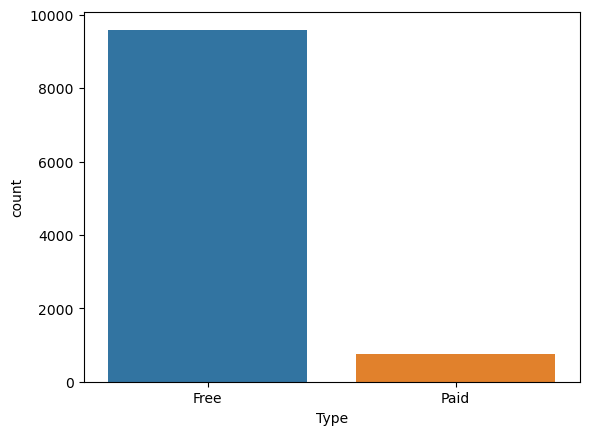

In [131]:
sns.countplot(x=data['Type'])

<Axes: xlabel='Content Rating', ylabel='count'>

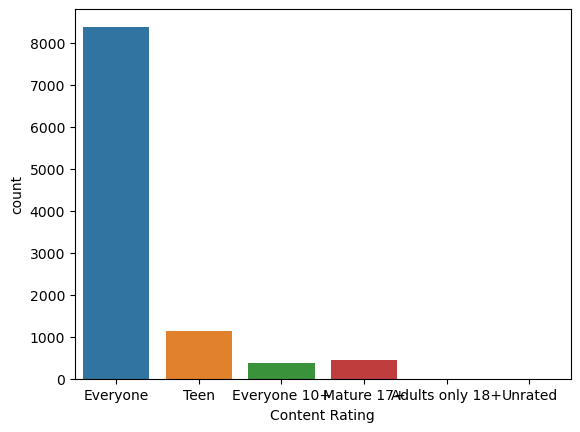

In [132]:
sns.countplot(x=data['Content Rating'])

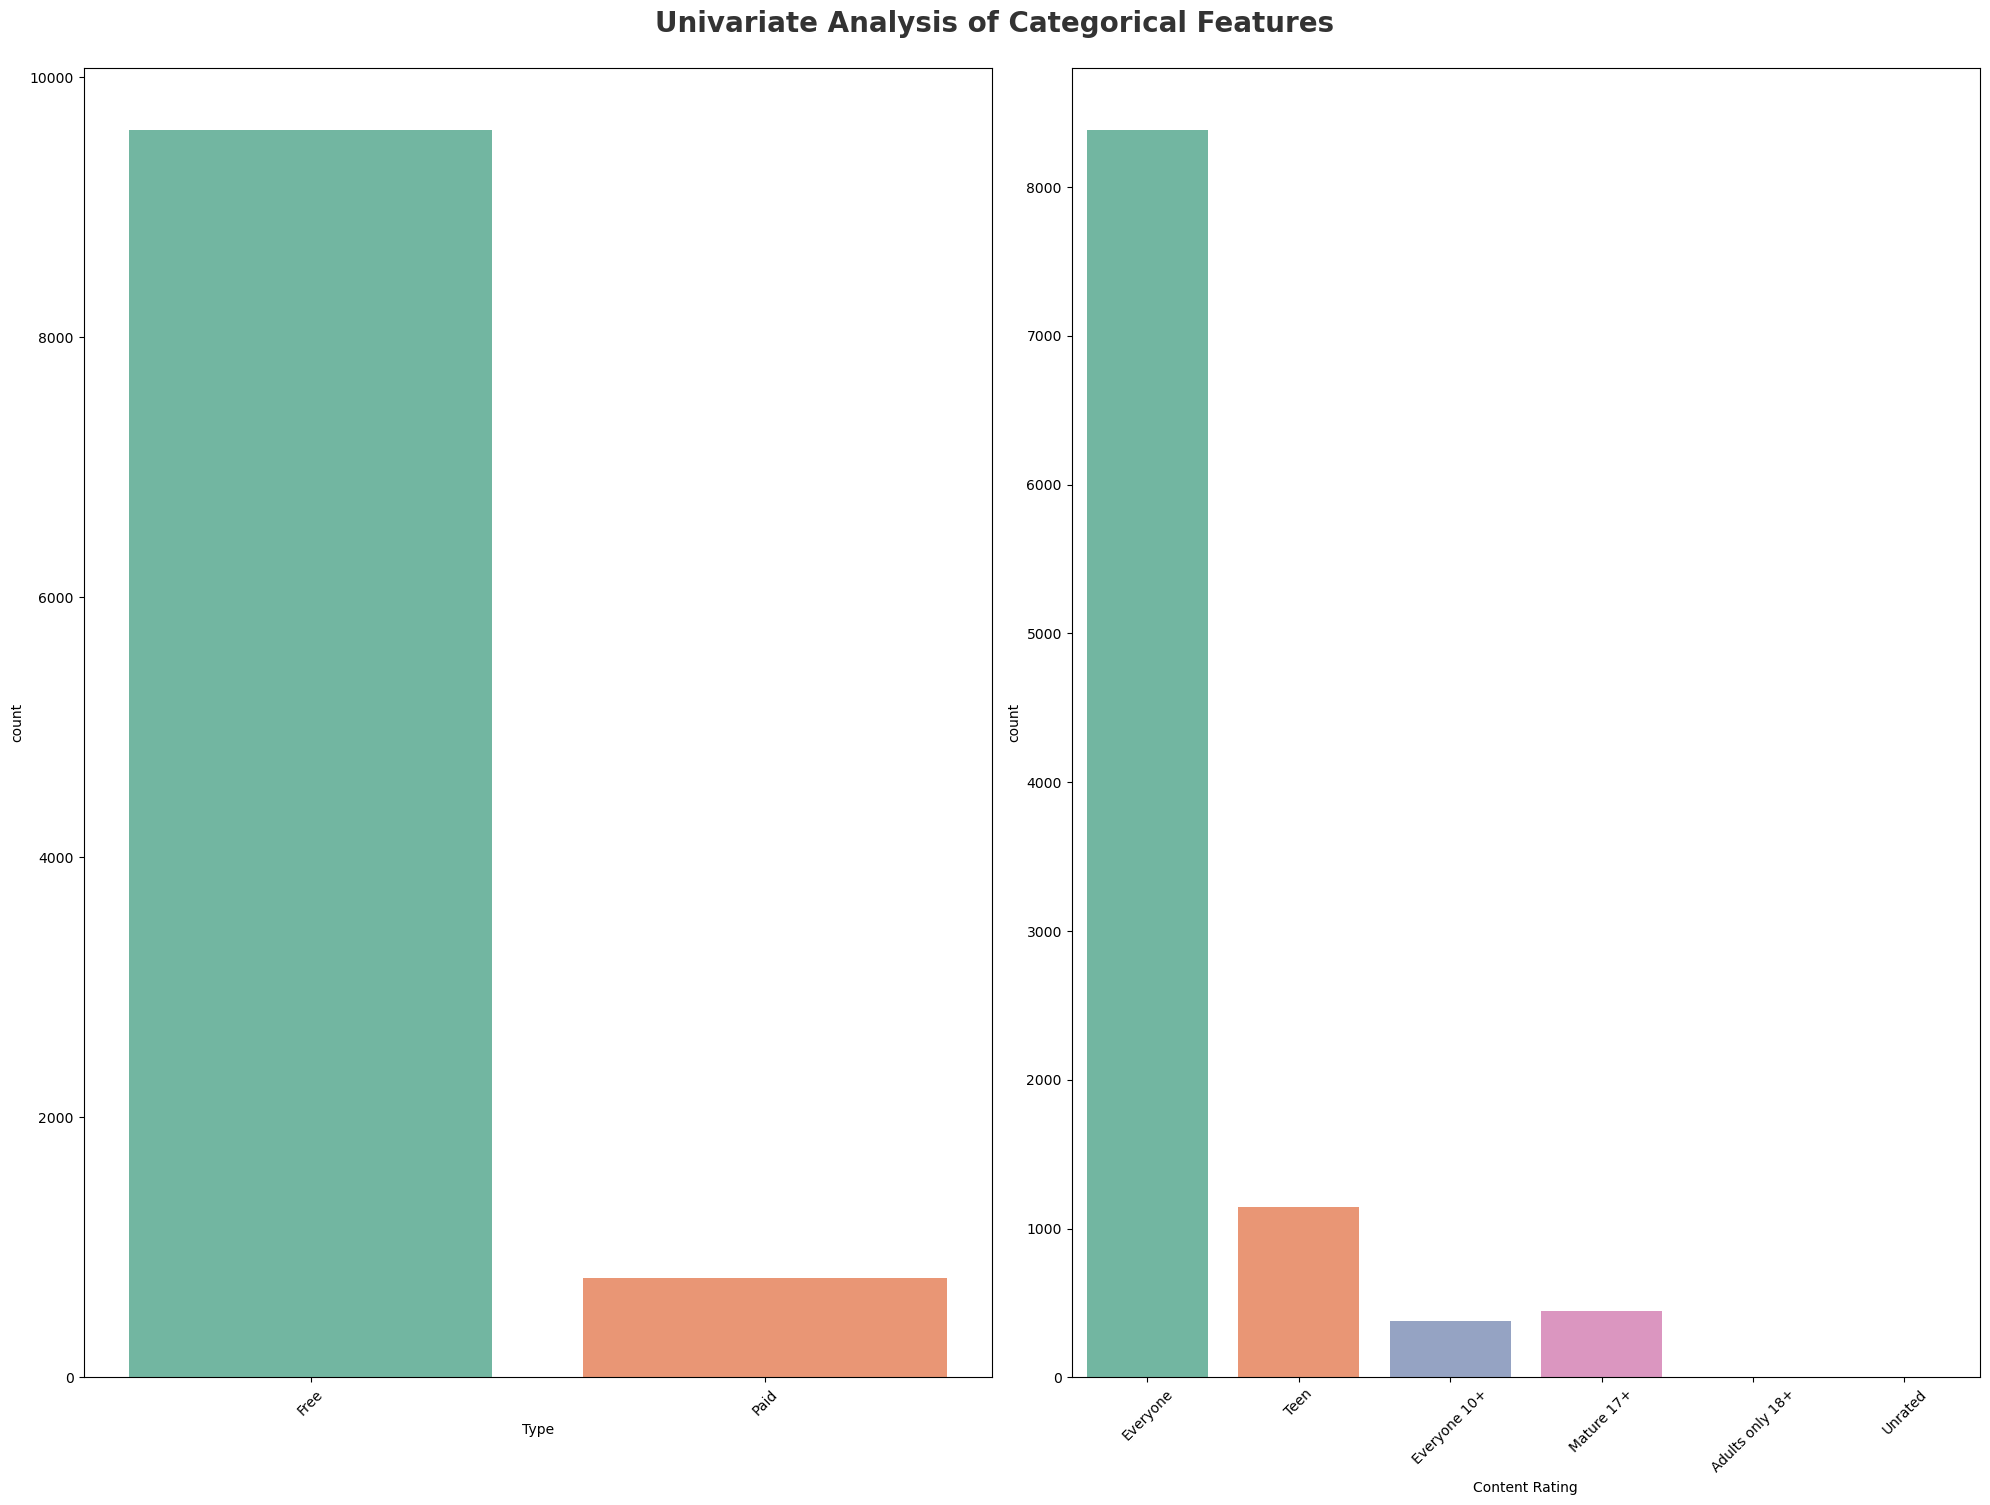

In [136]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20, fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=data[category[i]],palette="Set2")
    plt.xticks(rotation=45)
    plt.xlabel(category[i])
    plt.tight_layout()
   

In [137]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

<Axes: xlabel='Price', ylabel='Density'>

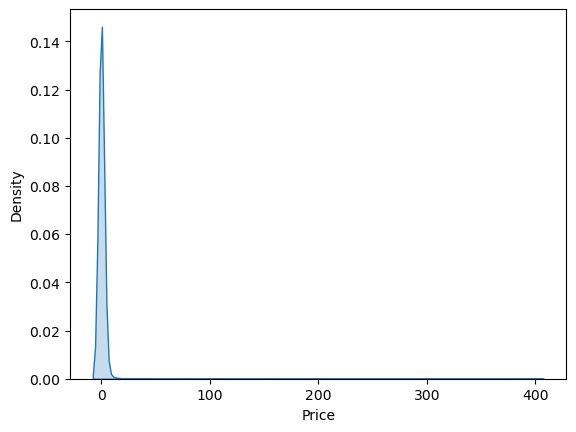

In [139]:
sns.kdeplot(data['Price'],shade=True)

<Axes: xlabel='Reviews', ylabel='Density'>

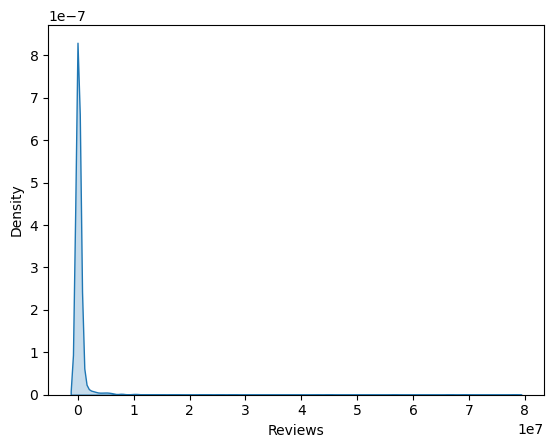

In [140]:
sns.kdeplot(data['Reviews'],shade=True)

<Axes: xlabel='Rating', ylabel='Density'>

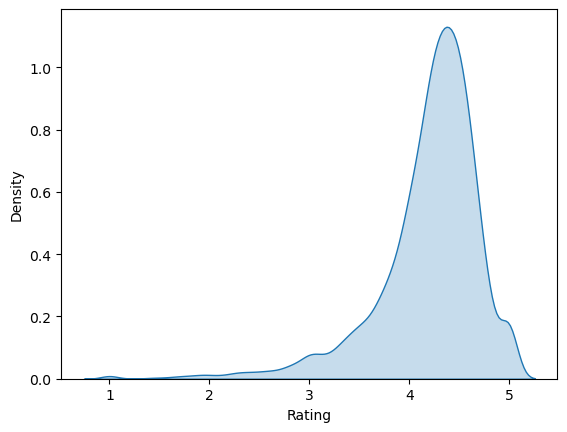

In [141]:
sns.kdeplot(data['Rating'],shade=True)

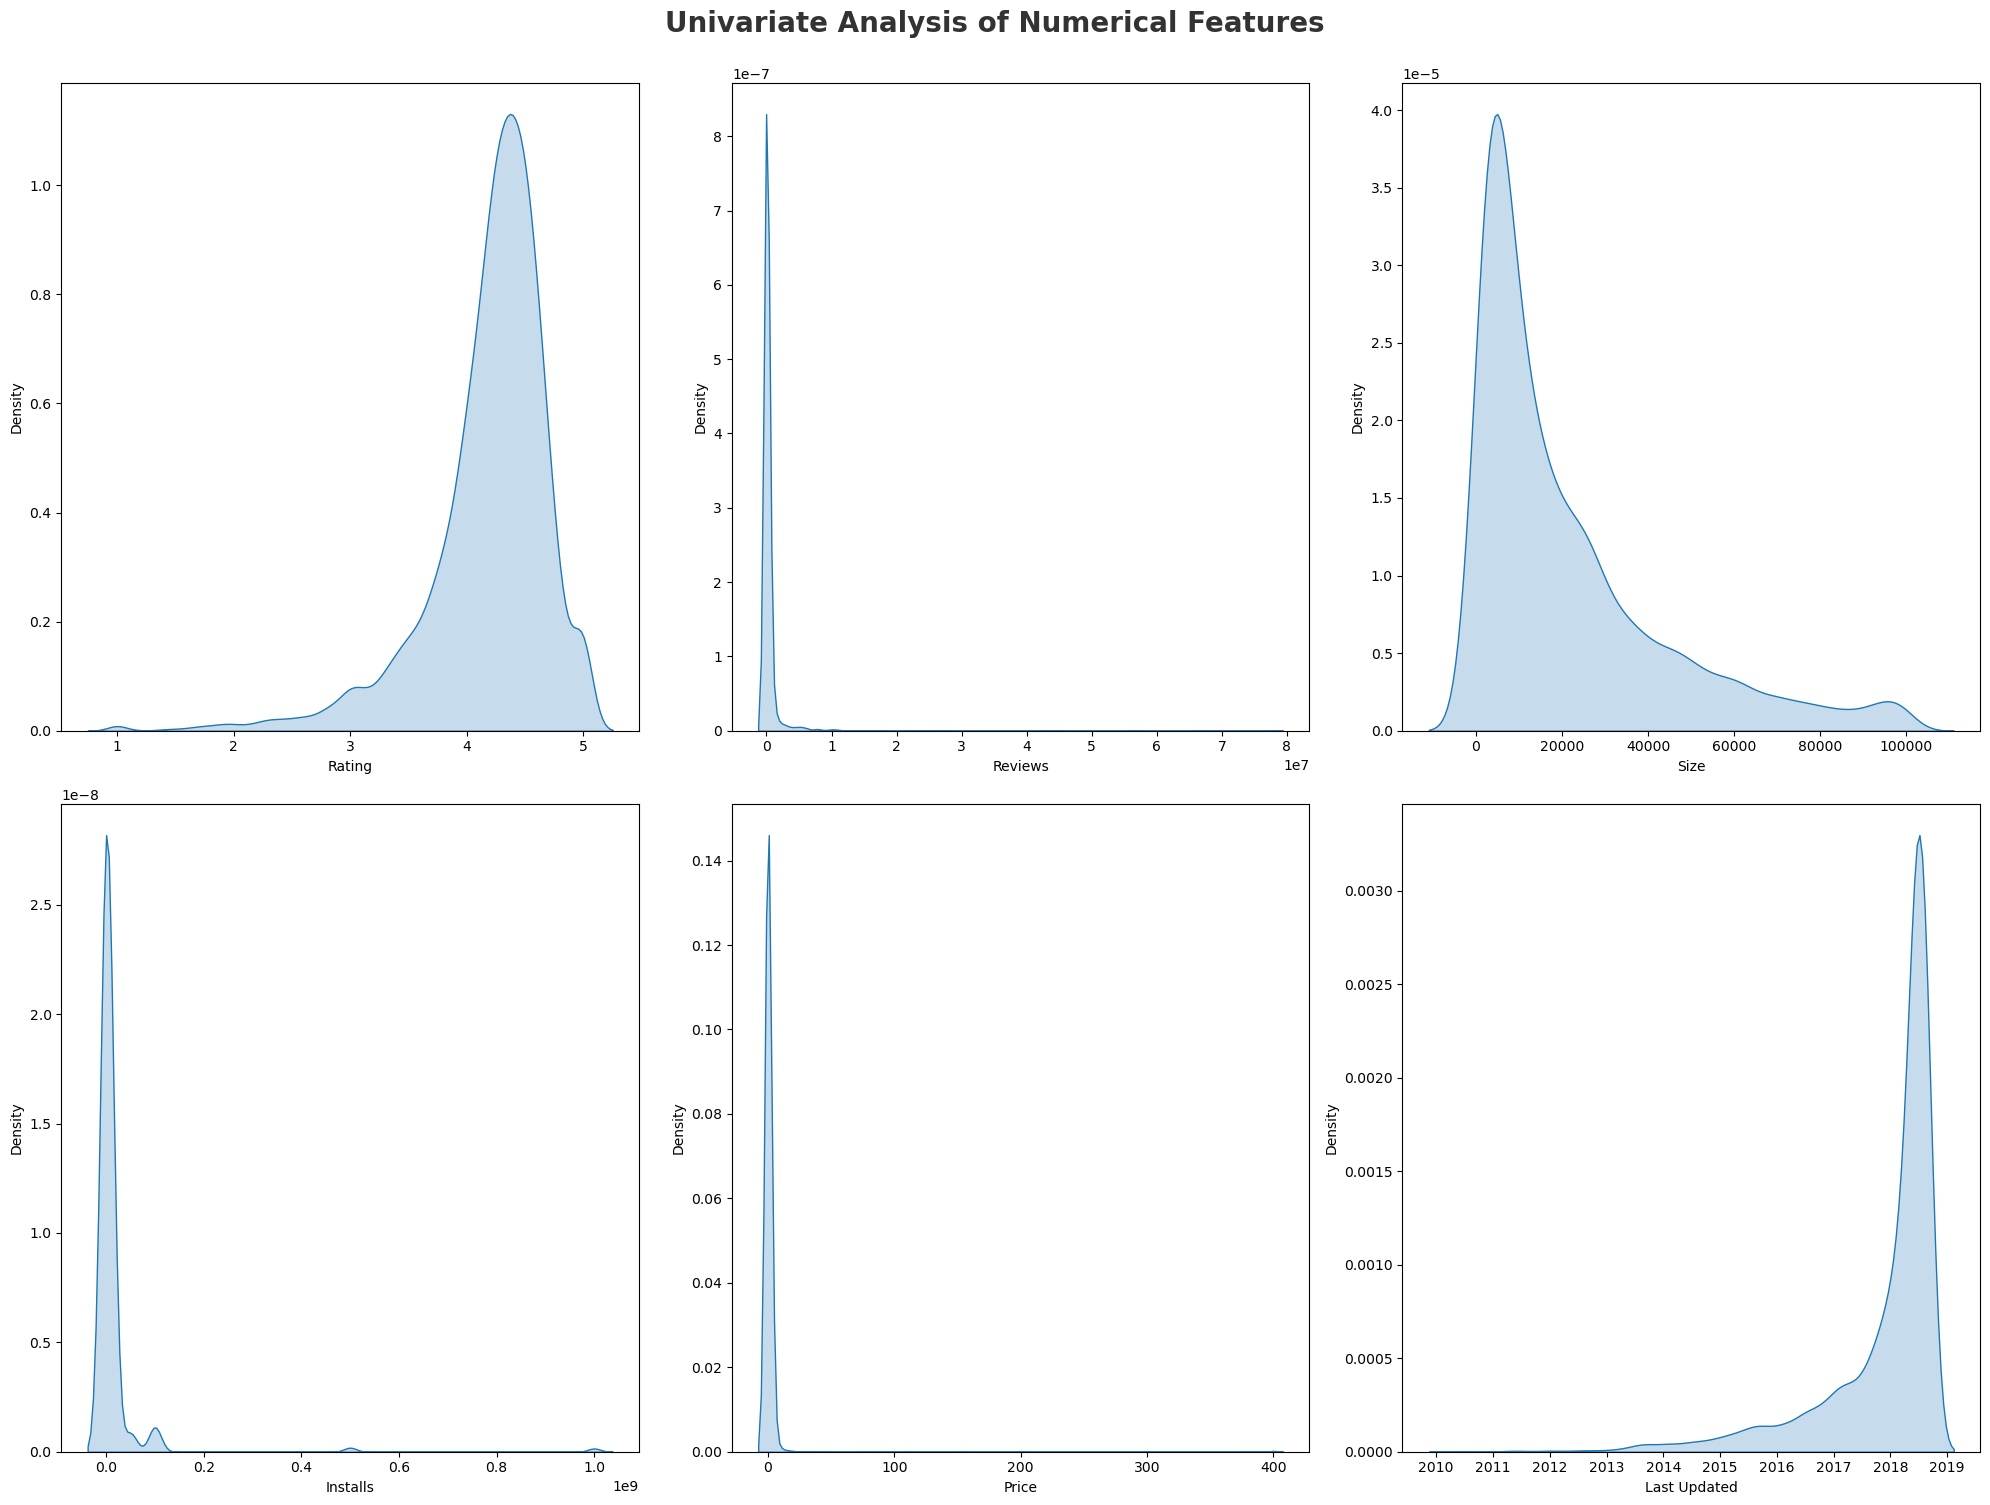

In [144]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(numeric_features)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data[numeric_features[i]],shade=True)
    plt.tight_layout()